# Assignment8

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.shape

(804, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

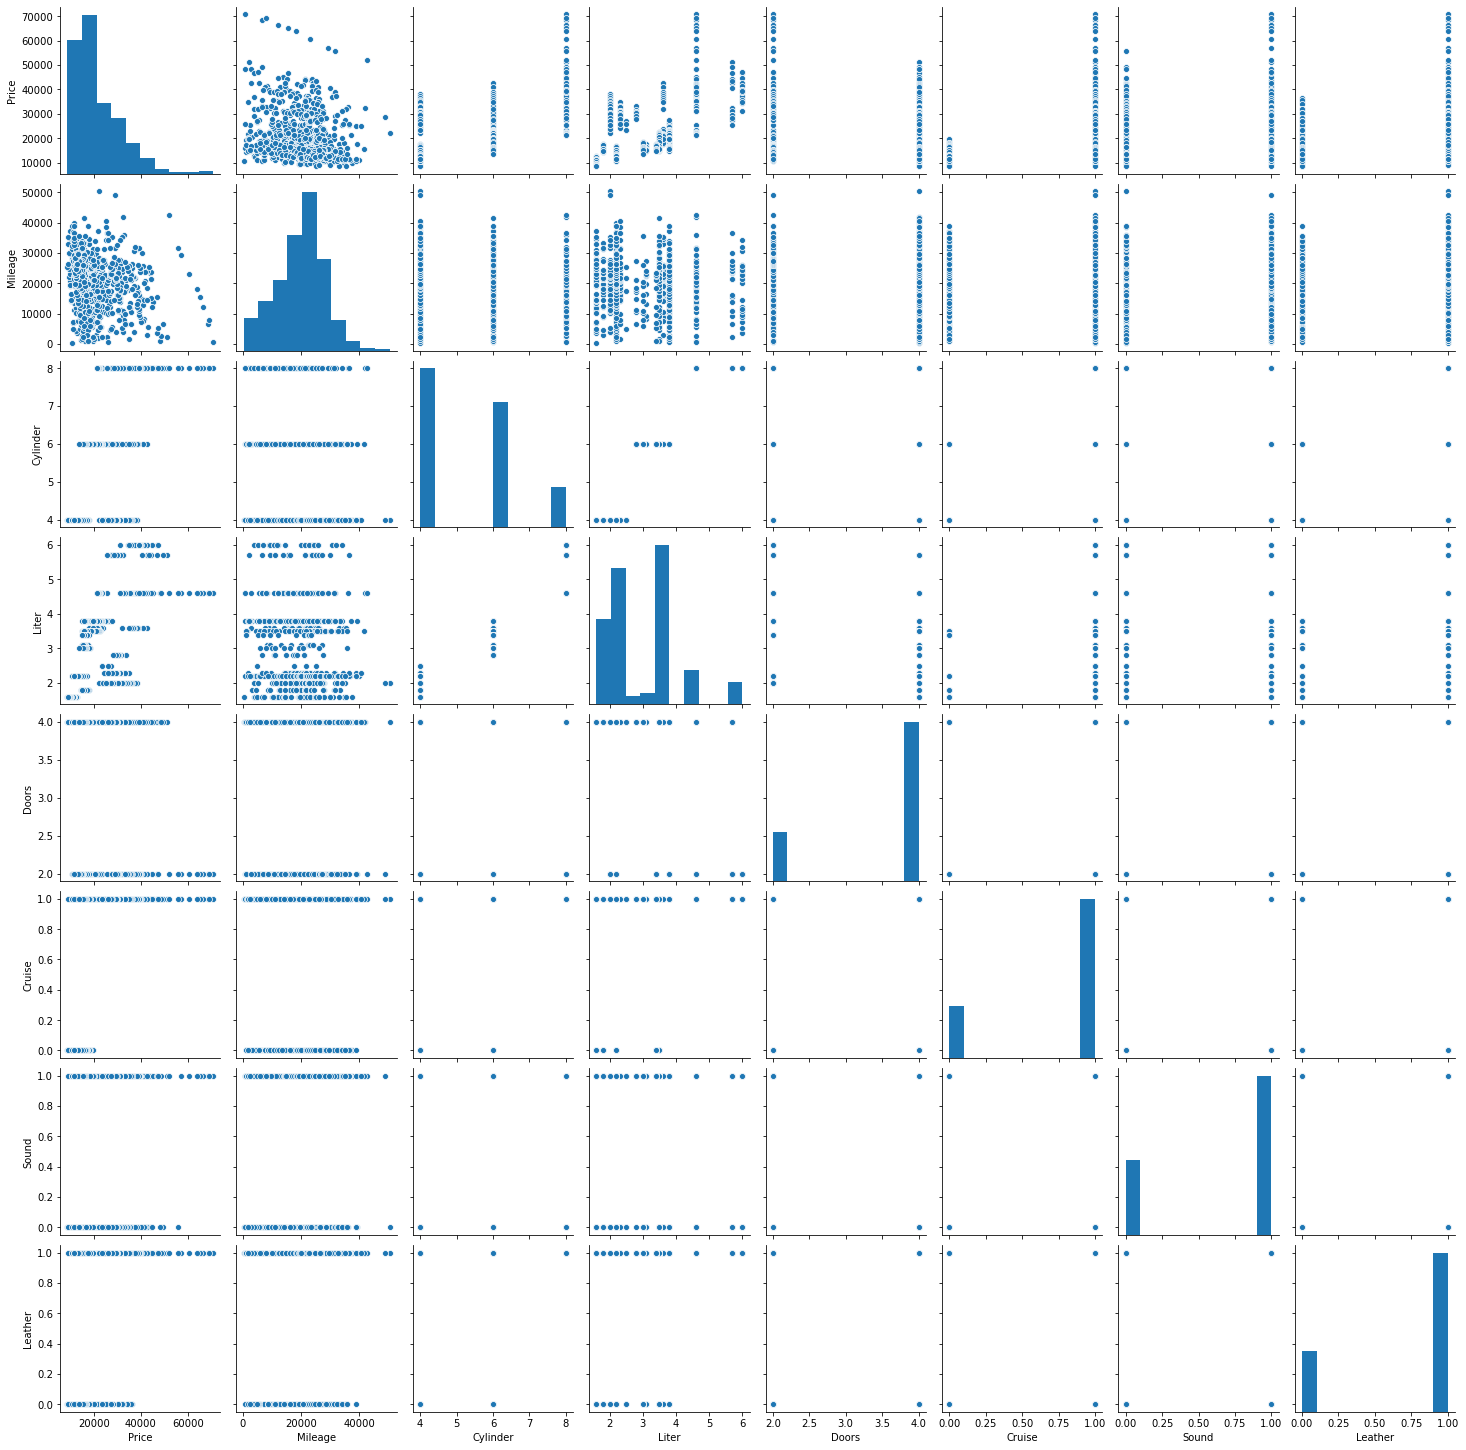

In [7]:
sns.pairplot(df)
plt.show

In [8]:
#Part 1

In [9]:
# To get 2D array
x1 = df[['Mileage']]
y1 = df[['Price']]

In [10]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x1, y1)

LinearRegression()

In [11]:
print('intercept:', linear_reg.intercept_)
print('coefficients:', linear_reg.coef_)
print('r-squared:', linear_reg.score(x1, y1))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


Text(0, 0.5, 'Price')

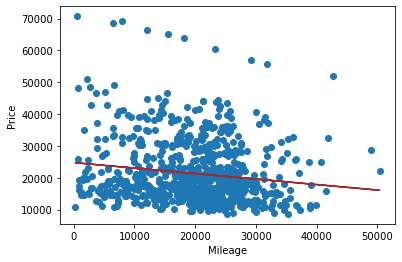

In [12]:
# Mileage vs Price chart
plt.scatter(x1,y1)
plt.plot(x1, linear_reg.predict(x1),color="brown")
plt.xlabel('Mileage')
plt.ylabel('Price')

In [13]:
#  With this equation the Rsquared value is around 2 % . This equation is not good fit for data.

In [14]:
# Part 2

In [15]:
req_feature=['Price','Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x2 = df[feature]
y2 = df[['Price']]

In [16]:
linear_reg2 = linear_model.LinearRegression()
linear_reg2.fit(x2, y2)


LinearRegression()

In [17]:
print('intercept:', linear_reg2.intercept_)
print('coefficients:', linear_reg2.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [18]:
print('r-squared: ', linear_reg2.score(x2, y2))

r-squared:  0.446264353672838


In [19]:
req_feature_data=df[req_feature]

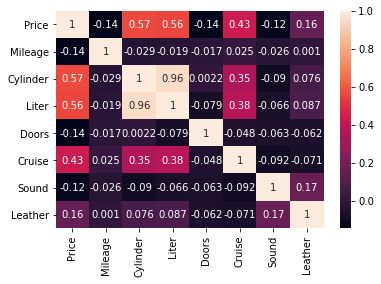

In [20]:
sns.heatmap(req_feature_data.corr(),annot=True)

In [21]:
# We are going to take one feature which is highly corelated and build the statsmodel 
x2_sm=sm.add_constant(x2['Cylinder'])
lr=sm.OLS(y2,x2)
lr_model=lr.fit()
#params
lr_model.params

Mileage       -0.126892
Cylinder    4911.417447
Liter      -1821.293102
Doors       -966.693273
Cruise      6664.262300
Sound      -1400.070423
Leather     3772.151977
dtype: float64

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1033.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:17:46   Log-Likelihood:                         -8305.0
No. Observations:                 804   AIC:                                  1.662e+04
Df Residuals:                     797   BIC:                                  1.666e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage       -0.1269      0.030     -4.260      0.000      -0.185      -0.068
Cylinder    4911.4174    612.957      8.013      0.000    3708.217    6114.618
Liter      -1821.2931    824.244     -2.210      0.027   -3439.239    -203.347
Doors       -966.6933    279.745     -3.456      0.001   -1515.818    -417.569
Cruise      6664.2623    654.546     10.182      0.000    5379.425    7949.100
Sound      -1400.0704    551.581     -2.538      0.011   -2482.794    -317.347
Leather     3772.1520    590.418      6.389      0.000    2613.194    4931.110
==============================================================================
Omnibus:                      123.518   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.040
Skew:                           1.010   Prob(JB):                     7.32e-43
Kurtosis:                       4.308   Cond. No.                     8.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Checking VIF (Variance Influence Factor)
vif=pd.DataFrame()
vif['Features']=feature
vif['VIF']=[variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Cylinder,161.84
2,Liter,102.99
3,Doors,14.95
0,Mileage,5.93
4,Cruise,4.68
6,Leather,3.66
5,Sound,3.00


In [24]:
# for a good model:
 
# •	Make sure that co-efficients are positive.
# •	P value less than 0.05
# •	R-squared value will close to 1 and VIF is low.


In [25]:
# Based on that - we are removing the features which has p value higher than 0.05 and negative co-effcients and high vif value
# so excluding 'cylinder' and 'liter' features
mod_feature=['Liter', 'Cruise', 'Leather']
x2_mod=df[mod_feature]

In [26]:
# Building the model again with Statsmodel
x2_sm=sm.add_constant(x2_mod)
lr=sm.OLS(y2,x2_mod)
lr_model=lr.fit()
#params
lr_model.params

Liter      4389.967539
Cruise     6750.834364
Leather    3753.978638
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              2179.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:17:46   Log-Likelihood:                         -8343.0
No. Observations:                 804   AIC:                                  1.669e+04
Df Residuals:                     801   BIC:                                  1.671e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Liter       4389.9675    213.934     20.520      0.000    3970.030    4809.905
Cruise      6750.8344    664.768     10.155      0.000    5445.942    8055.727
Leather     3753.9786    557.178      6.737      0.000    2660.277    4847.680
==============================================================================
Omnibus:                      207.850   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.126
Skew:                           1.332   Prob(JB):                    1.26e-115
Kurtosis:                       5.948   Cond. No.                         8.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Checking VIF (Variance Influence Factor)
vif=pd.DataFrame()
vif['Features']=mod_feature
vif['VIF']=[variance_inflation_factor(x2_mod.values,i) for i in range(x2_mod.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,Liter,6.34
1,Cruise,4.41
2,Leather,2.98


In [29]:
# Initially statsmodel gave 90 % Rsquared value with 7 Featues
# In the second iteration , our model gives 89.1 % Rsquared values with 3 featues only.

In [30]:
# Part 3

In [31]:
#Research dummy variables in scikit-learn to see how to use the make, model, and body type.
dm_feature=['Make','Model','Type']
dm_feature_Price=['Price','Make','Model','Type']

In [32]:
dm_dataset=df[dm_feature_Price]

In [33]:
# Dummpy variables creation for Make
dm_make=pd.get_dummies(df['Make'],drop_first=True)
print(dm_make)
dm_dataset_df=pd.concat([dm_dataset,dm_make],axis=1)

     Cadillac  Chevrolet  Pontiac  SAAB  Saturn
0           0          0        0     0       0
1           0          0        0     0       0
2           0          0        0     0       0
3           0          0        0     0       0
4           0          0        0     0       0
..        ...        ...      ...   ...     ...
799         0          0        0     0       1
800         0          0        0     0       1
801         0          0        0     0       1
802         0          0        0     0       1
803         0          0        0     0       1

[804 rows x 5 columns]


In [34]:
# Dummpy variables creation for Model
dm_model=pd.get_dummies(df['Model'],drop_first=True)
print(dm_model)
dm_dataset_df=pd.concat([dm_dataset_df,dm_model],axis=1)

     9_3  9_3 HO  9_5  9_5 HO  AVEO  Bonneville  CST-V  CTS  Cavalier  \
0      0       0    0       0     0           0      0    0         0   
1      0       0    0       0     0           0      0    0         0   
2      0       0    0       0     0           0      0    0         0   
3      0       0    0       0     0           0      0    0         0   
4      0       0    0       0     0           0      0    0         0   
..   ...     ...  ...     ...   ...         ...    ...  ...       ...   
799    0       0    0       0     0           0      0    0         0   
800    0       0    0       0     0           0      0    0         0   
801    0       0    0       0     0           0      0    0         0   
802    0       0    0       0     0           0      0    0         0   
803    0       0    0       0     0           0      0    0         0   

     Century  ...  Lacrosse  Lesabre  Malibu  Monte Carlo  Park Avenue  \
0          1  ...         0        0       0     

In [36]:
# Dummpy variables creation for Type

dm_type=pd.get_dummies(df['Type'],drop_first=True)
print(dm_type)
dm_dataset_df=pd.concat([dm_dataset_df,dm_type],axis=1)

     Coupe  Hatchback  Sedan  Wagon
0        0          0      1      0
1        0          0      1      0
2        0          0      1      0
3        0          0      1      0
4        0          0      1      0
..     ...        ...    ...    ...
799      0          0      1      0
800      0          0      1      0
801      0          0      1      0
802      0          0      1      0
803      0          0      1      0

[804 rows x 4 columns]


In [37]:
dm_dataset_df_data=dm_dataset_df.drop(['Make','Model','Type'],axis=1)
dm_dataset_df_data

,Price,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9_3,9_3 HO,9_5,9_5 HO,...,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
dm_dataset_df_data.shape

(804, 41)

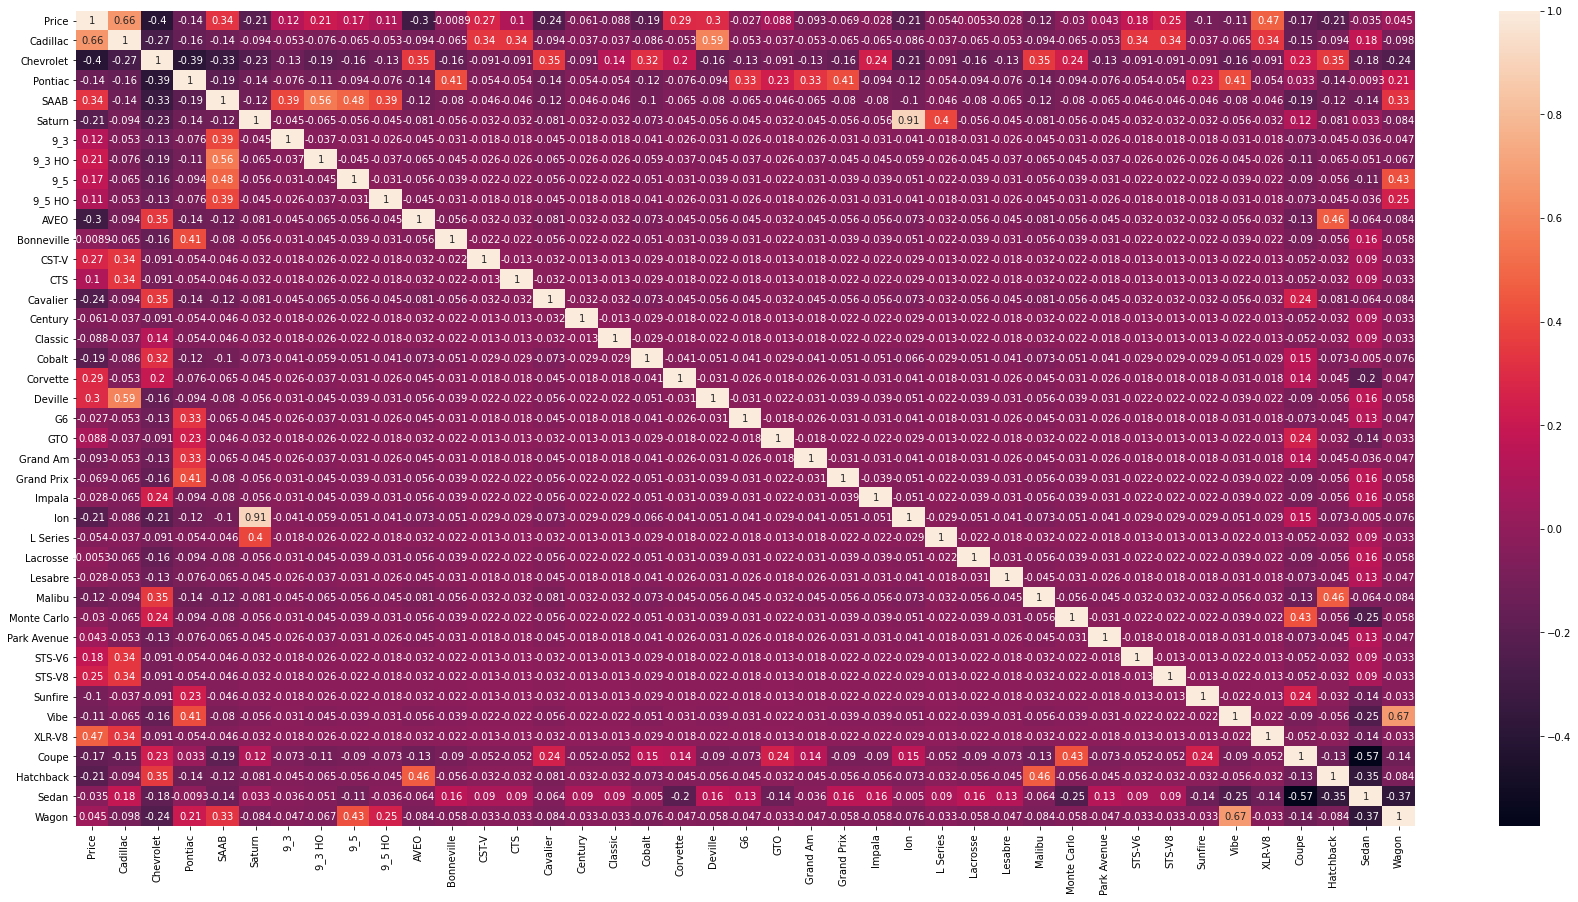

In [38]:
plt.figure(figsize=(30,15))
sns.heatmap(dm_dataset_df_data.corr(),annot=True)
plt.show()

In [40]:
x_dm_dataset=dm_dataset_df_data.iloc[:,1:]
y_dm_dataset=dm_dataset_df_data['Price']

In [42]:
y_dm_dataset

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [45]:
# Building the model again with Statsmodel
x_dm_dataset_sm=sm.add_constant(x_dm_dataset["Cadillac"])
lr=sm.OLS(y_dm_dataset,x_dm_dataset)
lr_model=lr.fit()
#params
lr_model.params

Cadillac       40840.100329
Chevrolet      21358.400094
Pontiac        21687.972749
SAAB           30758.868985
Saturn         14070.122103
9_3             1375.545252
9_3 HO          2757.370326
9_5             5188.107890
9_5 HO          3411.572117
AVEO           -4643.297365
Bonneville      5381.717157
CST-V          10356.140560
CTS            -4211.639102
Cavalier       -2508.641111
Century        22162.844560
Classic        -1587.167473
Cobalt         -1383.732685
Corvette       20694.499711
Deville         1571.497895
G6              4137.611547
GTO            13236.649162
Grand Am        -124.417835
Grand Prix      2375.690496
Impala          4738.009164
Ion             5416.001543
L Series        8654.120561
Lacrosse       27251.176615
Lesabre        25806.764222
Malibu          1770.797587
Monte Carlo     4277.932266
Park Avenue    30188.769920
STS-V6          2707.800414
STS-V8          8317.664319
Sunfire        -3310.611841
Vibe              -8.665935
XLR-V8         22098

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     507.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:19:13   Log-Likelihood:                -7256.3
No. Observations:                 804   AIC:                         1.458e+04
Df Residuals:                     768   BIC:                         1.475e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cadillac     4.084e+04    396.105    103.104      0.000    4.01e+04    4.16e+04
Chevrolet    2.136e+04    404.992     52.738      0.000    2.06e+04    2.22e+04
Pontiac      2.169e+04    441.551     49.118      0.000    2.08e+04    2.26e+04
SAAB         3.076e+04   1280.008     24.030      0.000    2.82e+04    3.33e+04
Saturn       1.407e+04    388.097     36.254      0.000    1.33e+04    1.48e+04
9_3          1375.5453   1298.915      1.059      0.290   -1174.300    3925.391
9_3 HO       2757.3703   1257.516      2.193      0.029     288.794    5225.947
9_5          5188.1079   1113.453      4.659      0.000    3002.335    7373.881
9_5 HO       3411.5721   1166.504      2.925      0.004    1121.657    5701.487
AVEO        -4643.2974    324.822    -14.295      0.000   -5280.941   -4005.654
Bonneville   5381.7172    389.547     13.815      0.000    4617.015    6146.420
CST-V        1.036e+04    605.140     17.114      0.000    9168.216    1.15e+04
CTS         -4211.6391    605.140     -6.960      0.000   -5399.563   -3023.715
Cavalier    -2508.6411    284.145     -8.829      0.000   -3066.434   -1950.848
Century      2.216e+04    800.343     27.692      0.000    2.06e+04    2.37e+04
Classic     -1587.1675    600.247     -2.644      0.008   -2765.487    -408.848
Cobalt      -1383.7327    298.667     -4.633      0.000   -1970.033    -797.432
Corvette     2.069e+04    462.348     44.760      0.000    1.98e+04    2.16e+04
Deville      1571.4979    405.714      3.873      0.000     775.057    2367.939
G6           4137.6115    452.398      9.146      0.000    3249.528    5025.695
GTO          1.324e+04    625.397     21.165      0.000     1.2e+04    1.45e+04
Grand Am     -124.4178    443.117     -0.281      0.779    -994.281     745.445
Grand Prix   2375.6905    389.547      6.099      0.000    1610.988    3140.393
Impala       4738.0092    375.216     12.627      0.000    4001.438    5474.581
Ion          5416.0015    333.416     16.244      0.000    4761.486    6070.517
L Series     8654.1206    474.593     18.235      0.000    7722.466    9585.775
Lacrosse     2.725e+04    598.601     45.525      0.000    2.61e+04    2.84e+04
Lesabre      2.581e+04    654.889     39.406      0.000    2.45e+04    2.71e+04
Malibu       1770.7976    324.822      5.452      0.000    1133.154    2408.441
Monte Carlo  4277.9323    418.058     10.233      0.000    3457.260    5098.605
Park Avenue  3.019e+04    654.889     46.098      0.000    2.89e+04    3.15e+04
STS-V6       2707.8004    605.140      4.475      0.000    1519.876    3895.725
STS-V8       8317.6643    605.140     13.745      0.000    7129.740    9505.588
Sunfire     -3310.6118    625.397     -5.294      0.000   -4538.302   -2082.922
Vibe           -8.6659    651.071     -0.013      0.989   -1286.755    1269.423
XLR-V8        2.21e+04    677.705     32.60

In [73]:
# Variable selection using RFE

lm=linear_model.LinearRegression()
lm.fit(x_dm_dataset,y_dm_dataset)
rfe=RFE(lm,15)
rfe=rfe.fit(x_dm_dataset,y_dm_dataset)

C:\Users\sanka\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [74]:
# Here we selected top 8 feature to perform the automated RFE. It ranks the features based on the significance. True- means selected features.
list(zip(x_dm_dataset.columns,rfe.support_,rfe.ranking_))

[('Cadillac', True, 1),
 ('Chevrolet', True, 1),
 ('Pontiac', False, 18),
 ('SAAB', False, 17),
 ('Saturn', True, 1),
 ('9_3', False, 26),
 ('9_3 HO', False, 25),
 ('9_5', False, 23),
 ('9_5 HO', False, 24),
 ('AVEO', False, 5),
 ('Bonneville', False, 13),
 ('CST-V', True, 1),
 ('CTS', True, 1),
 ('Cavalier', False, 4),
 ('Century', False, 8),
 ('Classic', False, 3),
 ('Cobalt', False, 2),
 ('Corvette', True, 1),
 ('Deville', True, 1),
 ('G6', False, 12),
 ('GTO', False, 16),
 ('Grand Am', False, 7),
 ('Grand Prix', False, 10),
 ('Impala', True, 1),
 ('Ion', True, 1),
 ('L Series', True, 1),
 ('Lacrosse', False, 14),
 ('Lesabre', False, 11),
 ('Malibu', True, 1),
 ('Monte Carlo', True, 1),
 ('Park Avenue', False, 15),
 ('STS-V6', True, 1),
 ('STS-V8', True, 1),
 ('Sunfire', False, 6),
 ('Vibe', False, 9),
 ('XLR-V8', True, 1),
 ('Coupe', False, 19),
 ('Hatchback', False, 21),
 ('Sedan', False, 20),
 ('Wagon', False, 22)]

In [75]:
col=x_dm_dataset.columns[rfe.support_]
col

Index(['Cadillac', 'Chevrolet', 'Saturn', 'CST-V', 'CTS', 'Corvette',
       'Deville', 'Impala', 'Ion', 'L Series', 'Malibu', 'Monte Carlo',
       'STS-V6', 'STS-V8', 'XLR-V8'],
      dtype='object')

In [76]:
# Building the model again using stats model
x_train_rfe=x_dm_dataset[col]
x_train_rfe=sm.add_constant(x_train_rfe)
lm=sm.OLS(y_dm_dataset,x_train_rfe)
lr_model=lm.fit()
#params
lr_model.params

const          22643.664268
Cadillac       17021.733490
Chevrolet     -10139.495717
Saturn         -5090.672832
CST-V           5357.526678
CTS            -9210.252984
Corvette       26651.543823
Deville        -3427.115987
Impala          7418.924254
Ion            -4088.607606
L Series       -1002.065225
Malibu          4662.759705
Monte Carlo     7337.788949
STS-V6         -2290.813468
STS-V8          3319.050437
XLR-V8         23273.338813
dtype: float64

In [77]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     250.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.11e-269
Time:                        18:46:10   Log-Likelihood:                -7879.3
No. Observations:                 804   AIC:                         1.579e+04
Df Residuals:                     790   BIC:                         1.585e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.264e+04    237.383     95.389      0.000    2.22e+04    2.31e+04
Cadillac     1.702e+04    502.384     33.882      0.000     1.6e+04     1.8e+04
Chevrolet   -1.014e+04    405.023    -25.034      0.000   -1.09e+04   -9344.448
Saturn      -5090.6728    532.454     -9.561      0.000   -6135.864   -4045.481
CST-V        5357.5267   1263.629      4.240      0.000    2877.059    7837.995
CTS         -9210.2530   1263.629     -7.289      0.000   -1.17e+04   -6729.785
Corvette     2.665e+04   1037.750     25.682      0.000    2.46e+04    2.87e+04
Deville     -3427.1160    820.780     -4.175      0.000   -5038.283   -1815.949
Impala       7418.9243    868.244      8.545      0.000    5714.586    9123.263
Ion         -4088.6076    627.658     -6.514      0.000   -5320.682   -2856.533
L Series    -1002.0652    954.400     -1.050      0.294   -2875.525     871.394
Malibu       4662.7597    656.331      7.104      0.000    3374.401    5951.119
Monte Carlo  7337.7889    868.244      8.451      0.000    5633.450    9042.128
STS-V6      -2290.8135   1263.629     -1.813      0.070   -4771.281     189.654
STS-V8       3319.0504   1263.629      2.627      0.009     838.582    5799.518
XLR-V8       2.327e+04   1263.629     18.418      0.000    2.08e+04    2.58e+04
==============================================================================
Omnibus:                       44.293   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.229
Skew:                           0.488   Prob(JB):                     1.38e-13
Kurtosis:                       3.903   Cond. No.                     1.75e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
# Removing the L Series and STS-V6 which has P-values more than 0.005 P values
x_train_new=x_train_rfe.drop(['L Series','STS-V6'],axis=1)

In [81]:
# Building the model again using stats model

x_train_new=sm.add_constant(x_train_new)
lm=sm.OLS(y_dm_dataset,x_train_new)
lr_model=lm.fit()
#params
lr_model.params

const          22643.664268
Cadillac       14730.920022
Chevrolet     -10139.495717
Saturn         -6092.738057
CST-V           7648.340146
CTS            -6919.439516
Corvette       26651.543823
Deville        -1136.302518
Impala          7418.924254
Ion            -3086.542381
Malibu          4662.759705
Monte Carlo     7337.788949
STS-V8          5609.863905
XLR-V8         25564.152282
dtype: float64

In [82]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     250.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.11e-269
Time:                        18:47:02   Log-Likelihood:                -7879.3
No. Observations:                 804   AIC:                         1.579e+04
Df Residuals:                     790   BIC:                         1.585e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.264e+04    237.383     95.389      0.000    2.22e+04    2.31e+04
Cadillac     1.473e+04   1412.380     10.430      0.000     1.2e+04    1.75e+04
Chevrolet   -1.014e+04    405.023    -25.034      0.000   -1.09e+04   -9344.448
Saturn      -6092.7381   1412.380     -4.314      0.000   -8865.200   -3320.276
CST-V        7648.3401   1968.993      3.884      0.000    3783.263    1.15e+04
CTS         -6919.4395   1968.993     -3.514      0.000   -1.08e+04   -3054.363
Corvette     2.665e+04   1037.750     25.682      0.000    2.46e+04    2.87e+04
Deville     -1136.3025   1607.676     -0.707      0.480   -4292.125    2019.520
Impala       7418.9243    868.244      8.545      0.000    5714.586    9123.263
Ion         -3086.5424   1525.175     -2.024      0.043   -6080.418     -92.667
Malibu       4662.7597    656.331      7.104      0.000    3374.401    5951.119
Monte Carlo  7337.7889    868.244      8.451      0.000    5633.450    9042.128
STS-V8       5609.8639   1968.993      2.849      0.004    1744.787    9474.941
XLR-V8       2.556e+04   1968.993     12.983      0.000    2.17e+04    2.94e+04
==============================================================================
Omnibus:                       44.293   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.229
Skew:                           0.488   Prob(JB):                     1.38e-13
Kurtosis:                       3.903   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Checking VIF (Variance Influence Factor)
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Cadillac,7.41
3,Saturn,5.71
9,Ion,5.63
7,Deville,3.85
0,const,2.34
4,CST-V,1.98
5,CTS,1.98
12,STS-V8,1.98
13,XLR-V8,1.98
2,Chevrolet,1.63


In [85]:
# Removing the Cadillac which has high VIF
x_train_new=x_train_new.drop(['Cadillac'],axis=1)

In [86]:
# Building the model again using stats model

x_train_new=sm.add_constant(x_train_new)
lm=sm.OLS(y_dm_dataset,x_train_new)
lr_model=lm.fit()
#params
lr_model.params

const          23059.791952
Chevrolet     -10555.623401
Saturn         -6508.865741
CST-V          21963.132484
CTS             7395.352822
Corvette       26651.543823
Deville        13178.489819
Impala          7418.924254
Ion            -3086.542381
Malibu          4662.759705
Monte Carlo     7337.788949
STS-V8         19924.656243
XLR-V8         39878.944619
dtype: float64

In [87]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     230.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          8.00e-249
Time:                        18:50:06   Log-Likelihood:                -7931.2
No. Observations:                 804   AIC:                         1.589e+04
Df Residuals:                     791   BIC:                         1.595e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.306e+04    249.440     92.446      0.000    2.26e+04    2.35e+04
Chevrolet   -1.056e+04    429.636    -24.569      0.000   -1.14e+04   -9712.262
Saturn      -6508.8657   1504.933     -4.325      0.000   -9463.000   -3554.731
CST-V        2.196e+04   1504.933     14.594      0.000     1.9e+04    2.49e+04
CTS          7395.3528   1504.933      4.914      0.000    4441.218    1.03e+04
Corvette     2.665e+04   1106.195     24.093      0.000    2.45e+04    2.88e+04
Deville      1.318e+04    892.424     14.767      0.000    1.14e+04    1.49e+04
Impala       7418.9243    925.509      8.016      0.000    5602.179    9235.669
Ion         -3086.5424   1625.769     -1.899      0.058   -6277.873     104.789
Malibu       4662.7597    699.619      6.665      0.000    3289.430    6036.090
Monte Carlo  7337.7889    925.509      7.928      0.000    5521.044    9154.534
STS-V8       1.992e+04   1504.933     13.240      0.000     1.7e+04    2.29e+04
XLR-V8       3.988e+04   1504.933     26.499      0.000    3.69e+04    4.28e+04
==============================================================================
Omnibus:                       67.763   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.058
Skew:                           0.609   Prob(JB):                     9.33e-24
Kurtosis:                       4.296   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Removing the Ion which has P-values more than 0.005 P values
x_train_new=x_train_new.drop(['Ion'],axis=1)

In [89]:
# Building the model again using stats model

x_train_new=sm.add_constant(x_train_new)
lm=sm.OLS(y_dm_dataset,x_train_new)
lr_model=lm.fit()
#params
lr_model.params

const          23059.791952
Chevrolet     -10555.623401
Saturn         -9080.984392
CST-V          21963.132484
CTS             7395.352822
Corvette       26651.543823
Deville        13178.489819
Impala          7418.924254
Malibu          4662.759705
Monte Carlo     7337.788949
STS-V8         19924.656243
XLR-V8         39878.944619
dtype: float64

In [90]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     250.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          2.96e-249
Time:                        18:51:59   Log-Likelihood:                -7933.0
No. Observations:                 804   AIC:                         1.589e+04
Df Residuals:                     792   BIC:                         1.595e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.306e+04    249.850     92.295      0.000    2.26e+04    2.36e+04
Chevrolet   -1.056e+04    430.342    -24.528      0.000   -1.14e+04   -9710.878
Saturn      -9080.9844    656.302    -13.837      0.000   -1.04e+04   -7792.687
CST-V        2.196e+04   1507.405     14.570      0.000     1.9e+04    2.49e+04
CTS          7395.3528   1507.405      4.906      0.000    4436.371    1.04e+04
Corvette     2.665e+04   1108.013     24.053      0.000    2.45e+04    2.88e+04
Deville      1.318e+04    893.891     14.743      0.000    1.14e+04    1.49e+04
Impala       7418.9243    927.030      8.003      0.000    5599.198    9238.650
Malibu       4662.7597    700.769      6.654      0.000    3287.176    6038.343
Monte Carlo  7337.7889    927.030      7.915      0.000    5518.063    9157.515
STS-V8       1.992e+04   1507.405     13.218      0.000     1.7e+04    2.29e+04
XLR-V8       3.988e+04   1507.405     26.455      0.000    3.69e+04    4.28e+04
==============================================================================
Omnibus:                       66.663   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.669
Skew:                           0.607   Prob(JB):                     5.08e-23
Kurtosis:                       4.261   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Checking VIF (Variance Influence Factor)
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,2.27
1,Chevrolet,1.61
8,Malibu,1.23
7,Impala,1.12
9,Monte Carlo,1.12
2,Saturn,1.08
5,Corvette,1.08
6,Deville,1.04
3,CST-V,1.02
4,CTS,1.02


In [93]:
x_train_new.shape

(804, 12)

In [ ]:
# 12 out of 41 dummy features from Make , Model ,type provides the R-squared:	0.777 